# REAL ESTATE PREDICTIVE PRICE MODELLING 

PROBLEM STATEMENT - To create one predictive model on Real estate data so that it predicts price of property based on user needs , at the time of buying thier plots

GOAL - To make users hassel free on property decisions and just to get an approximate price with just fewer clicks according to thier needs

PROJECT WORKFLOW - 

    1. DATA COLLECTION 
    2. PERFORMING ANALYTICS
    3. DATA VISUALIZATION 
    4. REGRESION MODELLING 
    5. HYPOTHESIS TESTING 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_excel('/Users/soumobratamanna/Documents/Data_Science_Projects/tensorflow-test/Delhi_dataset.xlsx')

In [3]:
data.head(10)

,size_sq_ft,propertyType,bedrooms,localityName,suburbName,price,closest_mtero_station_km,metro_dist_m,Airport_dist_km,Hospital_dist_km,Railway_dist_km
0,400,Independent Floor,1,Swasthya Vihar,Delhi East,9000,0.577495,577.495488,21.741188,11.119239,6.227231
1,1050,Apartment,2,mayur vihar phase 1,Delhi East,20000,0.417142,417.142283,21.401856,9.419061,9.217502
2,2250,Independent Floor,2,Swasthya Vihar,Delhi East,28000,0.125136,125.136043,22.620365,11.829486,7.159184
3,1350,Independent Floor,2,Krishna Nagar,Delhi East,28000,0.371709,371.709423,22.681201,11.982708,7.097348
4,450,Apartment,2,New Ashok Nagar,Delhi East,12500,1.087760,1087.759520,22.592810,10.571573,10.263271
5,600,Independent House,2,New Ashok Nagar,Delhi East,10000,0.523298,523.298135,21.969591,9.938008,9.899589
6,600,Independent Floor,2,New Ashok Nagar,Delhi East,12000,0.636752,636.752085,22.028871,10.007711,9.868725
7,900,Independent Floor,2,mayur vihar phase 1,Delhi East,15500,0.214678,214.677919,20.897771,9.102314,8.075549
8,680,Independent Floor,2,mayur vihar phase 1,Delhi East,13000,0.074326,74.325684,20.774917,9.002174,7.920125
9,360,Independent Floor,1,New Ashok Nagar,Delhi East,8500,0.412997,412.997235,21.945488,9.897297,10.006371


In [4]:
data.tail(10)

,size_sq_ft,propertyType,bedrooms,localityName,suburbName,price,closest_mtero_station_km,metro_dist_m,Airport_dist_km,Hospital_dist_km,Railway_dist_km
17880,600,Independent Floor,2,Rajinder Nagar,Delhi West,25000,0.653546,653.545757,13.459312,8.335807,3.611655
17881,300,Apartment,1,Rajinder Nagar,Delhi West,22000,0.653546,653.545757,13.459312,8.335807,3.611655
17882,1800,Apartment,3,Rajinder Nagar,Delhi West,55000,0.780504,780.504232,12.734183,8.124997,4.258428
17883,1000,Independent Floor,1,Rajinder Nagar,Delhi West,18000,0.115243,115.242993,13.386857,8.954623,4.179034
17884,1100,Independent Floor,2,Rajinder Nagar,Delhi West,45000,1.156612,1156.611560,12.437176,7.798769,4.389114
17885,270,Independent Floor,1,Rajinder Nagar,Delhi West,15000,0.426038,426.037534,13.787582,8.372242,3.271959
17886,1000,Independent Floor,3,Rajinder Nagar,Delhi West,38000,0.425040,425.040417,13.787908,8.373653,3.272639
17887,1400,Independent Floor,1,Rajinder Nagar,Delhi West,47000,0.682508,682.508099,12.817571,8.207820,4.221707
17888,900,Independent Floor,1,Rajinder Nagar,Delhi West,8000,0.184343,184.343358,13.308030,8.669832,4.027845
17889,1000,Independent Floor,3,Rajinder Nagar,Delhi West,38000,0.125044,125.044418,14.048234,8.633506,3.184990


In [5]:
data.isnull().sum()

size_sq_ft                  0
propertyType                0
bedrooms                    0
localityName                0
suburbName                  0
price                       0
closest_mtero_station_km    0
metro_dist_m                0
Airport_dist_km             0
Hospital_dist_km            0
Railway_dist_km             0
dtype: int64

In [6]:
data.describe()

,size_sq_ft,bedrooms,price,closest_mtero_station_km,metro_dist_m,Airport_dist_km,Hospital_dist_km,Railway_dist_km
count,17890.000000,17890.000000,1.789000e+04,17890.000000,1.789000e+04,17890.000000,17890.000000,17890.000000
mean,1176.342091,2.168865,3.345196e+04,0.931495,9.314950e+02,13.727784,11.238134,11.421994
std,873.751044,0.971414,8.802054e+04,8.287856,8.287856e+03,11.357063,11.167202,11.063323
min,100.000000,1.000000,1.200000e+03,0.000692,6.921945e-01,1.784779,0.634508,0.722023
25%,620.000000,1.000000,1.350000e+04,0.457782,4.577823e+02,11.018715,7.769267,7.986813
50%,900.000000,2.000000,2.200000e+04,0.698560,6.985601e+02,13.184035,10.515524,11.015571
75%,1600.000000,3.000000,3.500000e+04,1.087740,1.087740e+03,17.163502,15.514042,15.192483
max,16521.000000,15.000000,5.885646e+06,1096.479453,1.096479e+06,1109.894053,1115.621439,1123.778457


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17890 entries, 0 to 17889
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   size_sq_ft                17890 non-null  int64  
 1   propertyType              17890 non-null  object 
 2   bedrooms                  17890 non-null  int64  
 3   localityName              17890 non-null  object 
 4   suburbName                17890 non-null  object 
 5   price                     17890 non-null  int64  
 6   closest_mtero_station_km  17890 non-null  float64
 7   metro_dist_m              17890 non-null  float64
 8   Airport_dist_km           17890 non-null  float64
 9   Hospital_dist_km          17890 non-null  float64
 10  Railway_dist_km           17890 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 1.5+ MB


Creating a copy of the dataset

In [8]:
data_copy = data.copy()

In [9]:
data_copy

,size_sq_ft,propertyType,bedrooms,localityName,suburbName,price,closest_mtero_station_km,metro_dist_m,Airport_dist_km,Hospital_dist_km,Railway_dist_km
0,400,Independent Floor,1,Swasthya Vihar,Delhi East,9000,0.577495,577.495488,21.741188,11.119239,6.227231
1,1050,Apartment,2,mayur vihar phase 1,Delhi East,20000,0.417142,417.142283,21.401856,9.419061,9.217502
2,2250,Independent Floor,2,Swasthya Vihar,Delhi East,28000,0.125136,125.136043,22.620365,11.829486,7.159184
3,1350,Independent Floor,2,Krishna Nagar,Delhi East,28000,0.371709,371.709423,22.681201,11.982708,7.097348
4,450,Apartment,2,New Ashok Nagar,Delhi East,12500,1.087760,1087.759520,22.592810,10.571573,10.263271
...,...,...,...,...,...,...,...,...,...,...,...
17885,270,Independent Floor,1,Rajinder Nagar,Delhi West,15000,0.426038,426.037534,13.787582,8.372242,3.271959
17886,1000,Independent Floor,3,Rajinder Nagar,Delhi West,38000,0.425040,425.040417,13.787908,8.373653,3.272639
17887,1400,Independent Floor,1,Rajinder Nagar,Delhi West,47000,0.682508,682.508099,12.817571,8.207820,4.221707
17888,900,Independent Floor,1,Rajinder Nagar,Delhi West,8000,0.184343,184.343358,13.308030,8.669832,4.027845


In [10]:
data_copy['bedrooms'].max()

15

Dropping datapoints having more than 4 bedrooms 

In [11]:
data_copy.drop(data_copy[(data_copy['bedrooms']>4)].index,inplace=True)


In [12]:
data_copy['bedrooms'].max()

4

In [13]:
data_copy['size_sq_ft'].max()

15500

In [14]:
data_copy.shape

(17775, 11)

Dropping datapoints having more than 50km distance

In [15]:
data_copy.drop(data_copy[(data_copy['Airport_dist_km']>50)].index,inplace=True)


In [16]:
data_copy.drop(data_copy[(data_copy['Hospital_dist_km']>50)].index,inplace=True)

In [17]:
data_copy.drop(data_copy[(data_copy['Railway_dist_km']>50)].index,inplace=True)

In [18]:
data_copy.shape

(17770, 11)

# DATA VISUALIZATION 

<AxesSubplot:>

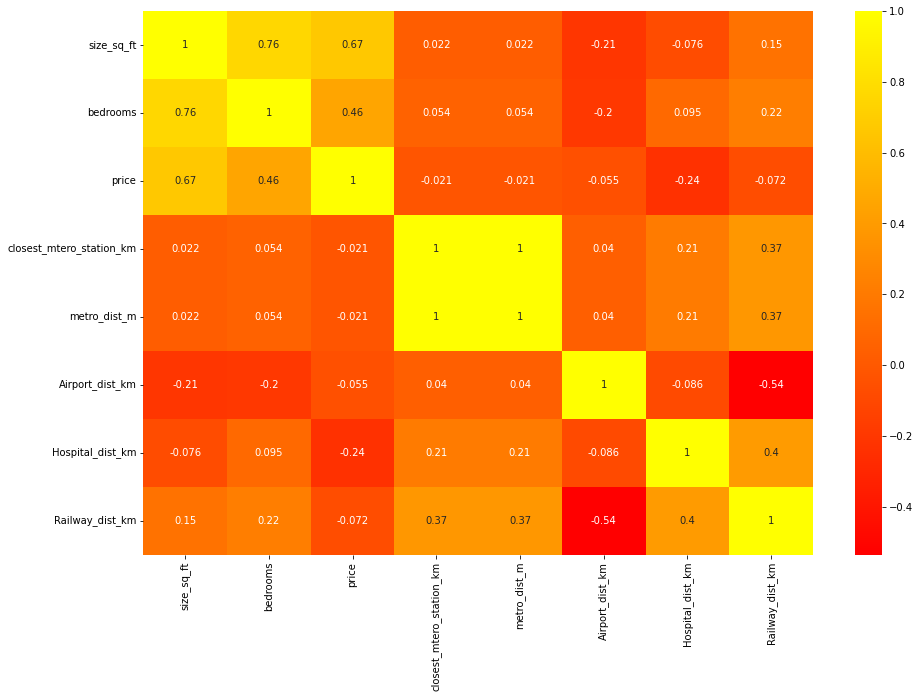

In [19]:
plt.figure(figsize = (15,10))
sns.heatmap(data_copy.corr(),annot=True , cmap = 'autumn')

OBSERVATION :

The above heatmap indicates that the variables are nicely correlaetd with each other

In [20]:
data_copy.columns

Index(['size_sq_ft', 'propertyType', 'bedrooms', 'localityName', 'suburbName',
       'price', 'closest_mtero_station_km', 'metro_dist_m', 'Airport_dist_km',
       'Hospital_dist_km', 'Railway_dist_km'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

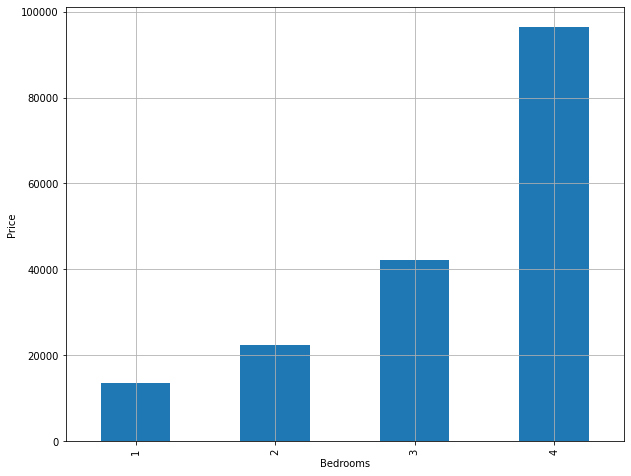

In [21]:
plt.figure(figsize = (10,8))
data_copy.groupby('bedrooms')['price'].mean().plot(kind = 'bar')
plt.xlabel('Bedrooms')
plt.grid()
plt.ylabel('Price')
plt.show

OBSERVATION :

With the increase in number of rooms the price is also increasing which is quite normal

<function matplotlib.pyplot.show(close=None, block=None)>

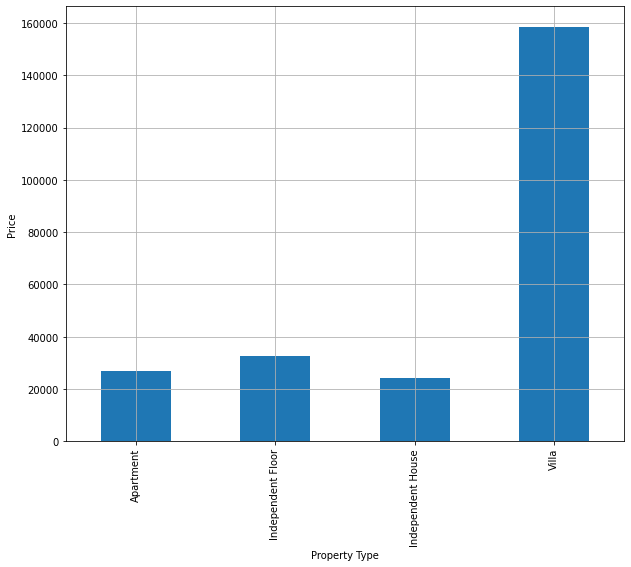

In [22]:
plt.figure(figsize = (10,8))
data_copy.groupby('propertyType')['price'].mean().plot(kind = 'bar')
plt.xlabel('Property Type')
plt.grid()
plt.ylabel('Price')
plt.show

OBSERVATION :
    
The price of Villas are more on comparison to other property types followed by independent floors

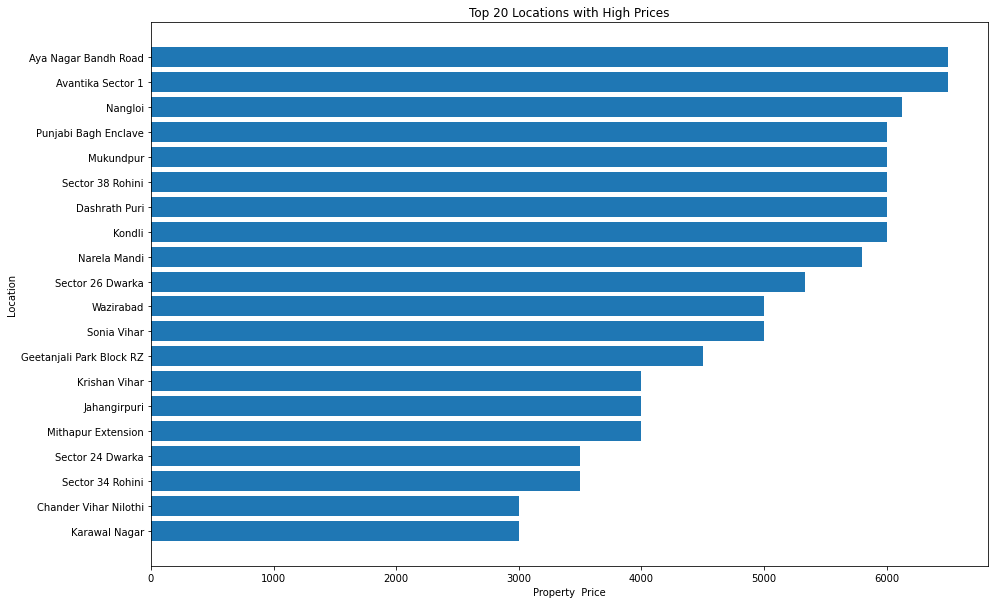

In [23]:
plt.figure(figsize = (15,10))
top_locations = data_copy.groupby('localityName')['price'].mean().sort_values(ascending=True)[:20]
plt.barh(top_locations.index, top_locations.values)

plt.title('Top 20 Locations with High Prices')
plt.xlabel('Property  Price')
plt.ylabel('Location')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

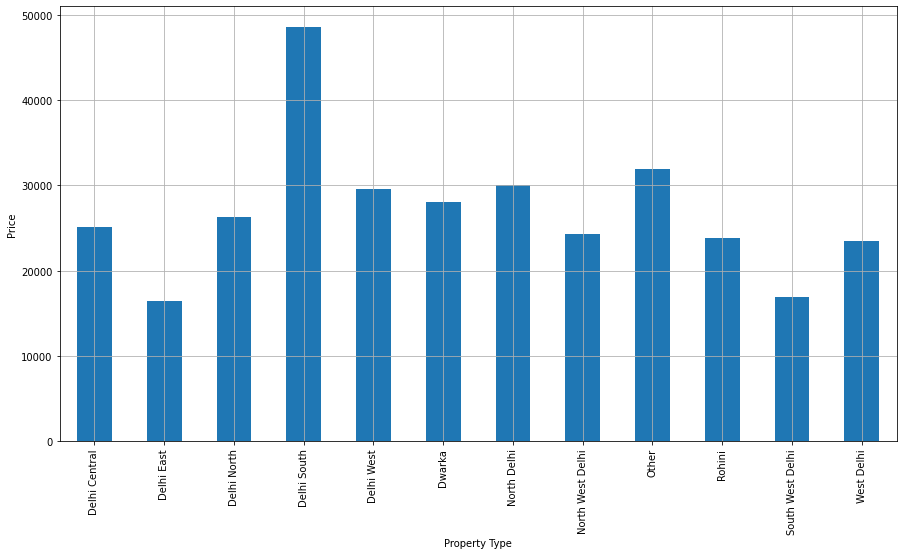

In [24]:
plt.figure(figsize = (15,8))
data_copy.groupby('suburbName')['price'].mean().plot(kind = 'bar')
plt.xlabel('Property Type')
plt.grid()
plt.ylabel('Price')
plt.show

OBSERVATION :

Delhi South having more higher prices followed by North Delhi

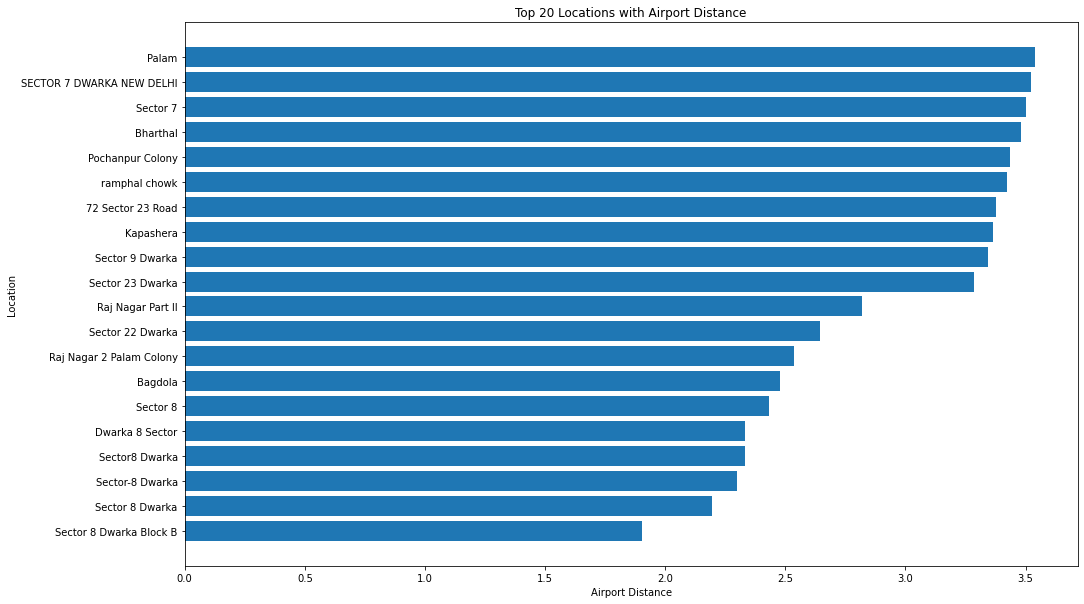

In [25]:
plt.figure(figsize = (16,10))
top_locations = data_copy.groupby('localityName')['Airport_dist_km'].mean().sort_values(ascending=True)[:20]
plt.barh(top_locations.index, top_locations.values)

plt.title('Top 20 Locations with Airport Distance')
plt.xlabel('Airport Distance')
plt.ylabel('Location')

plt.show()

Checking Scatter plots for all Continuous data variables present in the dataset for visualizing the Relationships among variables 

<Figure size 1080x720 with 0 Axes>

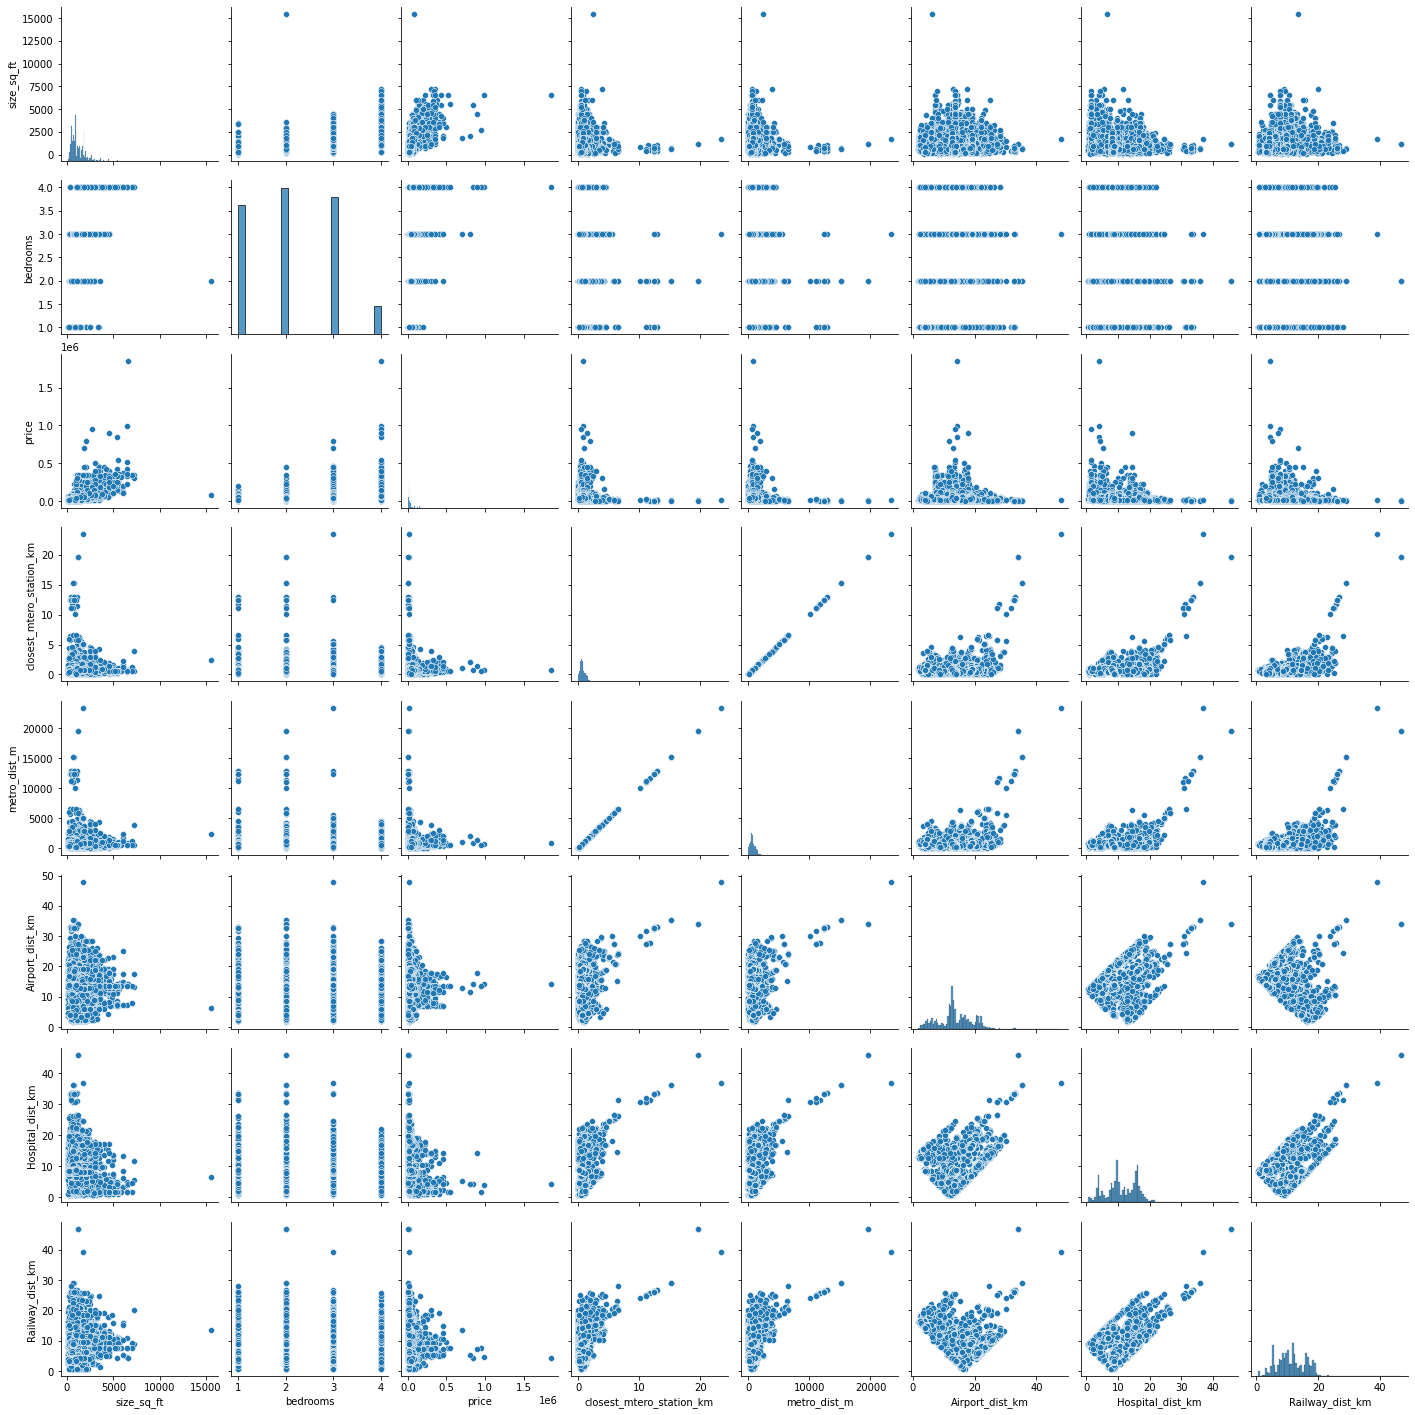

In [26]:
plt.figure(figsize = (15,10))
num_vars = data_copy.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(data_copy[num_vars], kind="scatter")

In [27]:
data_copy.columns

Index(['size_sq_ft', 'propertyType', 'bedrooms', 'localityName', 'suburbName',
       'price', 'closest_mtero_station_km', 'metro_dist_m', 'Airport_dist_km',
       'Hospital_dist_km', 'Railway_dist_km'],
      dtype='object')

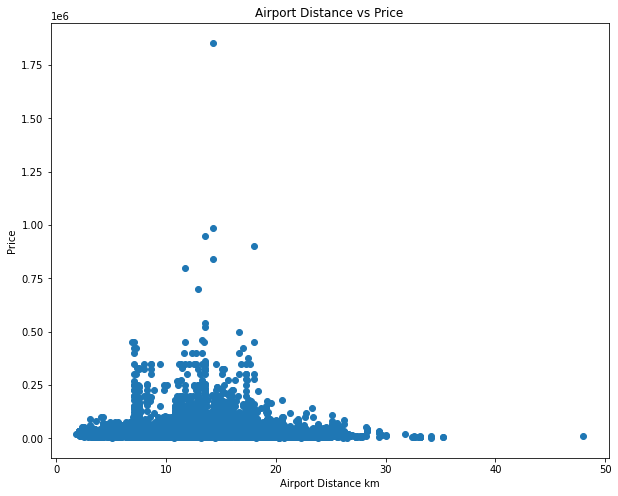

In [28]:
plt.figure(figsize = (10,8))
x = data_copy['Airport_dist_km']
y = data_copy['price']

plt.scatter(x,y)

plt.title('Airport Distance vs Price')
plt.xlabel('Airport Distance km')
plt.ylabel('Price')

plt.show()

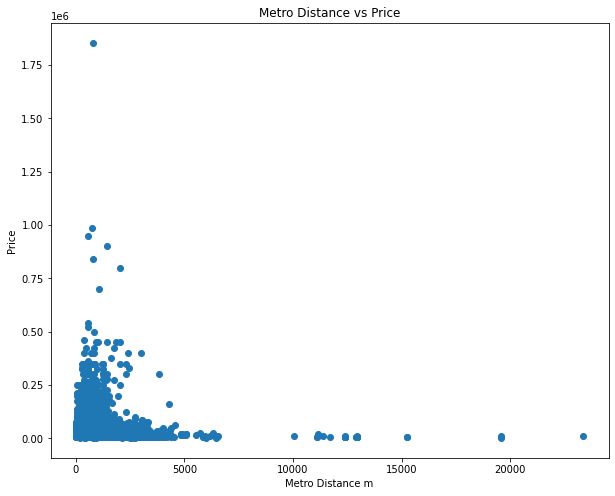

In [29]:
plt.figure(figsize = (10,8))
x = data_copy['metro_dist_m']
y = data_copy['price']

plt.scatter(x,y)

plt.title('Metro Distance vs Price')
plt.xlabel('Metro Distance m')
plt.ylabel('Price')

plt.show()

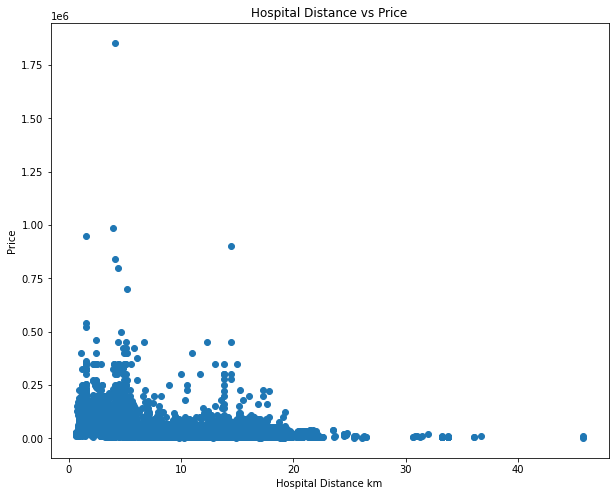

In [30]:
plt.figure(figsize = (10,8))
x = data_copy['Hospital_dist_km']
y = data_copy['price']

plt.scatter(x,y)

plt.title('Hospital Distance vs Price')
plt.xlabel('Hospital Distance km')
plt.ylabel('Price')

plt.show()

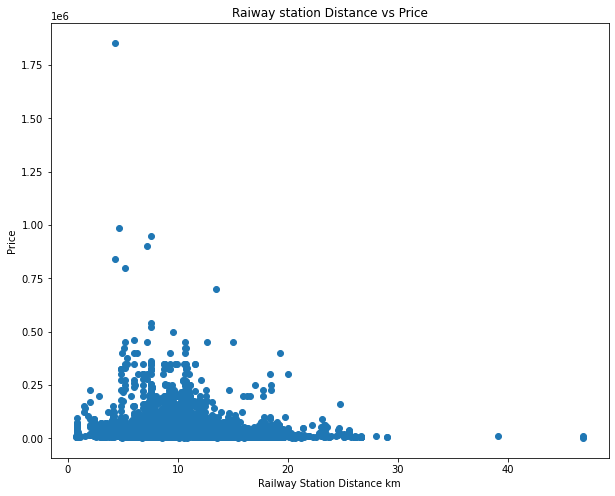

In [31]:
plt.figure(figsize = (10,8))
x = data_copy['Railway_dist_km']
y = data_copy['price']

plt.scatter(x,y)

plt.title('Raiway station Distance vs Price')
plt.xlabel('Railway Station Distance km')
plt.ylabel('Price')

plt.show()

OBSERVATION :

From the above scatter plots it depicts that as the distances are increasing the prices of the porperty are also increasing , it might be the reason that the area has developed well connecting highways for better transport facility 

Checking Location data for unique values and then segmenting them according to the datapoints

In [32]:
data_copy['localityName'].unique()

array(['Swasthya Vihar', 'mayur vihar phase 1', 'Krishna Nagar',
       'New Ashok Nagar', 'Anand Vihar', 'Preet Vihar', 'Shahdara',
       'Mandawali', 'Mayur Vihar II', 'AGCR Enclave', 'Mayur Vihar',
       'Trilokpuri', 'Vivek Vihar', 'Surajmal Vihar', 'Mayur Vihar III',
       'laxmi nagar near metro station', 'IP Extension', 'Patparganj',
       'Vinod Nagar North', 'Mayur Vihar I ext',
       'Mayur Vihar 1 Extension', 'Shakarpur', 'Geeta Colony',
       'Mayur Vihar I', 'Hargobind Enclave', 'Laxmi Nagary',
       'Guru Angad Nagar', 'Nirman Vihar', 'Radhu Place',
       'Dilshad Garden', 'Delhi', 'Yojna Vihar', 'Pandav Nagar',
       'Vikas Marg', 'GANESH NAGAR PANDAV NAGAR COMPLEX', 'Saini Enclave',
       'Vigyan Vihar', 'Vasundhara Enclave', 'Yamuna Vihar', 'Vaishali',
       'Ram Prastha Colony', 'Gagan Vihar', 'Govindpura',
       'New Ashok Nagar near metro', 'Ganesh Nagar', 'Gazipur',
       'Vinod Nagar East', 'Kapashera', 'Sector 25 Rohini',
       'Sector 14 Rohini', '

In [33]:
len(data_copy['localityName'].unique())

769

In [34]:
location_data = data_copy.groupby('localityName')['localityName'].agg('count').sort_values(ascending=False)

In [35]:
location_data

localityName
Patel Nagar            1448
Paschim Vihar           943
Chattarpur              825
Pitampura               607
mayur vihar phase 1     523
                       ... 
India Gate                1
Jagat Ram Park            1
Jagriti Enclave           1
Sarvapriya Vihar          1
10 Sector Dwarka          1
Name: localityName, Length: 769, dtype: int64

Checking Locations having datapoints less than 10

In [36]:
location_data[location_data<10]

localityName
Surajmal Vihar                       9
Khirki Extension Panchsheel Vihar    9
West Shalimar Bagh                   9
Geeta Colony                         9
Duggal Colony                        9
                                    ..
India Gate                           1
Jagat Ram Park                       1
Jagriti Enclave                      1
Sarvapriya Vihar                     1
10 Sector Dwarka                     1
Name: localityName, Length: 577, dtype: int64

In [37]:
len(location_data[location_data<10])

577

In [38]:
location_less_10 = location_data[location_data<10]
location_less_10

localityName
Surajmal Vihar                       9
Khirki Extension Panchsheel Vihar    9
West Shalimar Bagh                   9
Geeta Colony                         9
Duggal Colony                        9
                                    ..
India Gate                           1
Jagat Ram Park                       1
Jagriti Enclave                      1
Sarvapriya Vihar                     1
10 Sector Dwarka                     1
Name: localityName, Length: 577, dtype: int64

Grouping all the location having datapoints less than 10 into Other category using lambda function

In [39]:
data_copy.localityName = data_copy.localityName.apply(lambda x: 'Other' if x in location_less_10 else x)
data_copy.localityName

0             Swasthya Vihar
1        mayur vihar phase 1
2             Swasthya Vihar
3              Krishna Nagar
4            New Ashok Nagar
                ...         
17885         Rajinder Nagar
17886         Rajinder Nagar
17887         Rajinder Nagar
17888         Rajinder Nagar
17889         Rajinder Nagar
Name: localityName, Length: 17770, dtype: object

Length of Location data after creating Other category

In [40]:
len(data_copy.localityName.unique())

193

# REGRESSION MODELLING

dummies_data variable is being created using one hot encoding for Location column , since it is a Categorical Column

In [41]:
dummies_data = pd.get_dummies(data_copy.localityName)
dummies_data

,A4 Block Paschim Vihar,Abul Fazal Enclave Jamia Nagar,Alaknanda,Amar colony,Anand Niketan,Anand Vihar,Ashok Nagar,Ashok Vihar,Aya Nagar,Bali Nagar,...,West Patel Nagar,dwarka sector 12,greater kailash Enclave 1,i p extension patparganj,laxmi nagar,laxmi nagar near metro station,mayur vihar phase 1,nawada,rohini sector 5,vikaspuri
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


To avoid a dummy variable trap we should reduce 1 column , so here dropping other location column

In [42]:
final_df = pd.concat([data_copy,dummies_data.drop('Other',axis=1)],axis=1)

In [43]:
final_df


,size_sq_ft,propertyType,bedrooms,localityName,suburbName,price,closest_mtero_station_km,metro_dist_m,Airport_dist_km,Hospital_dist_km,...,West Patel Nagar,dwarka sector 12,greater kailash Enclave 1,i p extension patparganj,laxmi nagar,laxmi nagar near metro station,mayur vihar phase 1,nawada,rohini sector 5,vikaspuri
0,400,Independent Floor,1,Swasthya Vihar,Delhi East,9000,0.577495,577.495488,21.741188,11.119239,...,0,0,0,0,0,0,0,0,0,0
1,1050,Apartment,2,mayur vihar phase 1,Delhi East,20000,0.417142,417.142283,21.401856,9.419061,...,0,0,0,0,0,0,1,0,0,0
2,2250,Independent Floor,2,Swasthya Vihar,Delhi East,28000,0.125136,125.136043,22.620365,11.829486,...,0,0,0,0,0,0,0,0,0,0
3,1350,Independent Floor,2,Krishna Nagar,Delhi East,28000,0.371709,371.709423,22.681201,11.982708,...,0,0,0,0,0,0,0,0,0,0
4,450,Apartment,2,New Ashok Nagar,Delhi East,12500,1.087760,1087.759520,22.592810,10.571573,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17885,270,Independent Floor,1,Rajinder Nagar,Delhi West,15000,0.426038,426.037534,13.787582,8.372242,...,0,0,0,0,0,0,0,0,0,0
17886,1000,Independent Floor,3,Rajinder Nagar,Delhi West,38000,0.425040,425.040417,13.787908,8.373653,...,0,0,0,0,0,0,0,0,0,0
17887,1400,Independent Floor,1,Rajinder Nagar,Delhi West,47000,0.682508,682.508099,12.817571,8.207820,...,0,0,0,0,0,0,0,0,0,0
17888,900,Independent Floor,1,Rajinder Nagar,Delhi West,8000,0.184343,184.343358,13.308030,8.669832,...,0,0,0,0,0,0,0,0,0,0


In [44]:
final_data = final_df.drop('localityName',axis=1)
final_data

,size_sq_ft,propertyType,bedrooms,suburbName,price,closest_mtero_station_km,metro_dist_m,Airport_dist_km,Hospital_dist_km,Railway_dist_km,...,West Patel Nagar,dwarka sector 12,greater kailash Enclave 1,i p extension patparganj,laxmi nagar,laxmi nagar near metro station,mayur vihar phase 1,nawada,rohini sector 5,vikaspuri
0,400,Independent Floor,1,Delhi East,9000,0.577495,577.495488,21.741188,11.119239,6.227231,...,0,0,0,0,0,0,0,0,0,0
1,1050,Apartment,2,Delhi East,20000,0.417142,417.142283,21.401856,9.419061,9.217502,...,0,0,0,0,0,0,1,0,0,0
2,2250,Independent Floor,2,Delhi East,28000,0.125136,125.136043,22.620365,11.829486,7.159184,...,0,0,0,0,0,0,0,0,0,0
3,1350,Independent Floor,2,Delhi East,28000,0.371709,371.709423,22.681201,11.982708,7.097348,...,0,0,0,0,0,0,0,0,0,0
4,450,Apartment,2,Delhi East,12500,1.087760,1087.759520,22.592810,10.571573,10.263271,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17885,270,Independent Floor,1,Delhi West,15000,0.426038,426.037534,13.787582,8.372242,3.271959,...,0,0,0,0,0,0,0,0,0,0
17886,1000,Independent Floor,3,Delhi West,38000,0.425040,425.040417,13.787908,8.373653,3.272639,...,0,0,0,0,0,0,0,0,0,0
17887,1400,Independent Floor,1,Delhi West,47000,0.682508,682.508099,12.817571,8.207820,4.221707,...,0,0,0,0,0,0,0,0,0,0
17888,900,Independent Floor,1,Delhi West,8000,0.184343,184.343358,13.308030,8.669832,4.027845,...,0,0,0,0,0,0,0,0,0,0


In [45]:
final_data

,size_sq_ft,propertyType,bedrooms,suburbName,price,closest_mtero_station_km,metro_dist_m,Airport_dist_km,Hospital_dist_km,Railway_dist_km,...,West Patel Nagar,dwarka sector 12,greater kailash Enclave 1,i p extension patparganj,laxmi nagar,laxmi nagar near metro station,mayur vihar phase 1,nawada,rohini sector 5,vikaspuri
0,400,Independent Floor,1,Delhi East,9000,0.577495,577.495488,21.741188,11.119239,6.227231,...,0,0,0,0,0,0,0,0,0,0
1,1050,Apartment,2,Delhi East,20000,0.417142,417.142283,21.401856,9.419061,9.217502,...,0,0,0,0,0,0,1,0,0,0
2,2250,Independent Floor,2,Delhi East,28000,0.125136,125.136043,22.620365,11.829486,7.159184,...,0,0,0,0,0,0,0,0,0,0
3,1350,Independent Floor,2,Delhi East,28000,0.371709,371.709423,22.681201,11.982708,7.097348,...,0,0,0,0,0,0,0,0,0,0
4,450,Apartment,2,Delhi East,12500,1.087760,1087.759520,22.592810,10.571573,10.263271,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17885,270,Independent Floor,1,Delhi West,15000,0.426038,426.037534,13.787582,8.372242,3.271959,...,0,0,0,0,0,0,0,0,0,0
17886,1000,Independent Floor,3,Delhi West,38000,0.425040,425.040417,13.787908,8.373653,3.272639,...,0,0,0,0,0,0,0,0,0,0
17887,1400,Independent Floor,1,Delhi West,47000,0.682508,682.508099,12.817571,8.207820,4.221707,...,0,0,0,0,0,0,0,0,0,0
17888,900,Independent Floor,1,Delhi West,8000,0.184343,184.343358,13.308030,8.669832,4.027845,...,0,0,0,0,0,0,0,0,0,0


Splitting the dataset between independent and dependent variables 

In [46]:
X = final_data.drop(['price','propertyType','suburbName'],axis=1)
Y = final_data['price']

In [47]:
X

,size_sq_ft,bedrooms,closest_mtero_station_km,metro_dist_m,Airport_dist_km,Hospital_dist_km,Railway_dist_km,A4 Block Paschim Vihar,Abul Fazal Enclave Jamia Nagar,Alaknanda,...,West Patel Nagar,dwarka sector 12,greater kailash Enclave 1,i p extension patparganj,laxmi nagar,laxmi nagar near metro station,mayur vihar phase 1,nawada,rohini sector 5,vikaspuri
0,400,1,0.577495,577.495488,21.741188,11.119239,6.227231,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1050,2,0.417142,417.142283,21.401856,9.419061,9.217502,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2250,2,0.125136,125.136043,22.620365,11.829486,7.159184,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1350,2,0.371709,371.709423,22.681201,11.982708,7.097348,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,450,2,1.087760,1087.759520,22.592810,10.571573,10.263271,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17885,270,1,0.426038,426.037534,13.787582,8.372242,3.271959,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17886,1000,3,0.425040,425.040417,13.787908,8.373653,3.272639,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17887,1400,1,0.682508,682.508099,12.817571,8.207820,4.221707,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17888,900,1,0.184343,184.343358,13.308030,8.669832,4.027845,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
Y

0         9000
1        20000
2        28000
3        28000
4        12500
         ...  
17885    15000
17886    38000
17887    47000
17888     8000
17889    38000
Name: price, Length: 17770, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split


In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [51]:
X_train

,size_sq_ft,bedrooms,closest_mtero_station_km,metro_dist_m,Airport_dist_km,Hospital_dist_km,Railway_dist_km,A4 Block Paschim Vihar,Abul Fazal Enclave Jamia Nagar,Alaknanda,...,West Patel Nagar,dwarka sector 12,greater kailash Enclave 1,i p extension patparganj,laxmi nagar,laxmi nagar near metro station,mayur vihar phase 1,nawada,rohini sector 5,vikaspuri
13122,450,1,0.952862,952.862444,13.717034,10.332294,5.204313,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9929,500,1,0.640251,640.251149,5.297127,16.254140,18.464897,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2871,2250,4,0.612408,612.408455,11.471602,3.859279,12.242777,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9020,1000,3,0.122005,122.005208,16.962323,15.198109,8.857667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7962,1620,3,1.725223,1725.223420,12.260141,16.421977,13.765433,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9418,650,2,11.085070,11085.070439,27.312566,30.681449,25.118149,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7330,450,2,0.499545,499.545200,7.702594,15.545599,15.747690,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17848,350,1,0.395513,395.513397,13.798672,8.698544,3.517692,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7332,2000,3,0.272766,272.766459,16.520368,15.703475,9.844226,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
X_test

,size_sq_ft,bedrooms,closest_mtero_station_km,metro_dist_m,Airport_dist_km,Hospital_dist_km,Railway_dist_km,A4 Block Paschim Vihar,Abul Fazal Enclave Jamia Nagar,Alaknanda,...,West Patel Nagar,dwarka sector 12,greater kailash Enclave 1,i p extension patparganj,laxmi nagar,laxmi nagar near metro station,mayur vihar phase 1,nawada,rohini sector 5,vikaspuri
15828,1658,3,0.549486,549.485506,5.331942,15.749570,17.667898,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14712,600,1,0.594900,594.900289,10.012712,9.322779,17.407210,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2062,1600,4,0.557557,557.556506,16.847824,17.148470,11.617472,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3330,1850,3,0.911896,911.896192,13.192833,1.333400,9.003557,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7257,450,1,0.147539,147.538734,7.833018,15.880759,16.096539,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,1030,1,0.745267,745.266651,18.051780,18.273277,12.420641,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11242,1958,3,1.423895,1423.895090,4.681906,14.394359,16.285840,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12365,400,1,0.421437,421.436636,12.665641,9.575000,5.457171,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17244,1850,3,0.290353,290.353255,25.275742,14.082816,9.998737,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#Using Standardization technique to scale down the values 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
X_train

array([[-0.92656651, -1.25145289,  0.11756578, ..., -0.05244935,
        -0.02516924, -0.06510365],
       [-0.86015321, -1.25145289, -0.26632538, ..., -0.05244935,
        -0.02516924, -0.06510365],
       [ 1.46431221,  2.03499803, -0.30051661, ..., -0.05244935,
        -0.02516924, -0.06510365],
       ...,
       [-1.0593931 , -1.25145289, -0.56686685, ..., -0.05244935,
        -0.02516924, -0.06510365],
       [ 1.13224572,  0.93951439, -0.71760186, ..., -0.05244935,
        -0.02516924, -0.06510365],
       [-0.39526012, -0.15596925, -0.4929768 , ..., -0.05244935,
        -0.02516924, -0.06510365]])

In [55]:
X_test

array([[ 0.67797877,  0.93951439, -0.37778689, ..., -0.05244935,
        -0.02516924, -0.06510365],
       [-0.72732661, -1.25145289, -0.32201689, ..., -0.05244935,
        -0.02516924, -0.06510365],
       [ 0.60093934,  2.03499803, -0.36787559, ..., -0.05244935,
        -0.02516924, -0.06510365],
       ...,
       [-0.9929798 , -1.25145289, -0.53503274, ..., -0.05244935,
        -0.02516924, -0.06510365],
       [ 0.93300583,  0.93951439, -0.69600502, ..., -0.05244935,
        -0.02516924, -0.06510365],
       [-1.04611044, -1.25145289, -0.85206401, ..., -0.05244935,
        -0.02516924, -0.06510365]])

# Loading the Model 

In [56]:
from sklearn.linear_model import LinearRegression


In [57]:
model = LinearRegression()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)

Score of the predictive model 

In [58]:
model.score(X_test,Y_test)

0.6392750068696467

Creating a Shufflesplit for the cross validation , randomizing my samples so that each of the fold has equal distributions and for checking 5 different model score

In [59]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.49958289, 0.70867991, 0.57964011, 0.6020999 , 0.54439239])

Grid Search CV is used for selecting the best algorithsm and for choosing the best parameters - Hyperparameter Tuning

In [60]:
# from sklearn.model_selection import GridSearchCV

# from sklearn.linear_model import Lasso
# from sklearn.tree import DecisionTreeRegressor

# def find_best_model_using_gridsearchcv(X,Y):
#     algos = {
#         'linear_regression' : {
#             'model': LinearRegression(),
#             'params': {
#                 'normalize': [True, False]
#             }
#         },
#         'lasso': {
#             'model': Lasso(),
#             'params': {
#                 'alpha': [1,2],
#                 'selection': ['random', 'cyclic']
#             }
#         },
#         'decision_tree': {
#             'model': DecisionTreeRegressor(),
#             'params': {
#                 'criterion' : ['mse','friedman_mse'],
#                 'splitter': ['best','random']
#             }
#         }
#     }
#     scores = []
#     cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#     for algo_name, config in algos.items():
#         gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
#         gs.fit(X,Y)
#         scores.append({
#             'model': algo_name,
#             'best_score': gs.best_score_,
#             'best_params': gs.best_params_
#         })

#     return pd.DataFrame(scores,columns=['model','best_score','best_params'])

# find_best_model_using_gridsearchcv(X,Y)


In [61]:
X.columns

Index(['size_sq_ft', 'bedrooms', 'closest_mtero_station_km', 'metro_dist_m',
       'Airport_dist_km', 'Hospital_dist_km', 'Railway_dist_km',
       'A4 Block Paschim Vihar', 'Abul Fazal Enclave Jamia Nagar', 'Alaknanda',
       ...
       'West Patel Nagar', 'dwarka sector 12', 'greater kailash Enclave 1',
       'i p extension patparganj', 'laxmi nagar',
       'laxmi nagar near metro station', 'mayur vihar phase 1', 'nawada',
       'rohini sector 5', 'vikaspuri'],
      dtype='object', length=199)

Searching the index number of the Column Location being checked 

In [62]:
np.where(X.columns=='dwarka sector 12')[0][0]

190

In [63]:
def predict_price(localityName,size_sq_ft,bedrooms):    
    loc_index = np.where(X.columns==localityName)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = size_sq_ft
    x[1] = bedrooms
    
    
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0] #extracts the first element of the resulting array, since predict function 
                                 #returns an array of predictions for each input 

Checking the predicted price of Different location in Delhi , by inputting parameters according to the user needs

In [64]:
predict_price('dwarka sector 12',450,1)

10706498.894232495

In [65]:
predict_price('dwarka sector 12',450,2)

10707001.071867505

In [66]:
predict_price('nawada',2000,4)

47479913.147836335

In [67]:
predict_price('vikaspuri',4500,4)

106788081.6969337

In [68]:
data_copy.columns

Index(['size_sq_ft', 'propertyType', 'bedrooms', 'localityName', 'suburbName',
       'price', 'closest_mtero_station_km', 'metro_dist_m', 'Airport_dist_km',
       'Hospital_dist_km', 'Railway_dist_km'],
      dtype='object')

# HYPOTHESIS TESTING 

In [69]:
from scipy.stats import pearsonr

HYPOTHESIS TEST - 1 

H0 = There is no significant relationship between the NUMBER OF BEDROOMS and PRICE of the property

H1 = There is a significant relationship between the NUMBER OF BEDROOMS and PRICE of the property

TEST PERFROMED - PEARSON'S COEEFECIENT CORRELATION

In [70]:
x = data_copy['bedrooms']
y = data_copy['price']

corr, p_val = pearsonr(x, y)

In [71]:
print("Pearson correlation coefficient:", corr)
print("p-value:", p_val)

Pearson correlation coefficient: 0.4575028145410889
p-value: 0.0


RESULT OBSERVATION : A Pearson correlation coefficient of 0.4575028145410889 indicates a moderate positive correlation between the two variables being tested. The p-value of 0.0 means that the likelihood of obtaining such a correlation coefficient by chance is very low, suggesting that there is a significant relationship between the two variables.

HYPOTHESIS TEST - 2

H0 = There is no significant relationship between the SIZE OF SQUARE FOOT  and PRICE of the property

H1 = There is a significant relationship between the SIZE OF SQUARE FOOT and PRICE of the property

TEST PERFROMED - PEARSON'S COEEFECIENT CORRELATION

In [72]:
x = data_copy['size_sq_ft']
y = data_copy['price']

corr, p_val = pearsonr(x, y)

In [73]:
print("Pearson correlation coefficient:", corr)
print("p-value:", p_val)

Pearson correlation coefficient: 0.6684365308691307
p-value: 0.0


OBSERVATION RESULT : the coefficient is 0.6684, which indicates a strong positive linear relationship between the two variables. The p-value of 0.0 indicates that this relationship is statistically significant, meaning that it is unlikely to have occurred by chance alone.

HYPOTHESIS TEST - 3

H0 = There is no significant relationship between the AIRPORT DISTANCE  and PRICE of the property

H1 = There is a significant relationship between the AIRPORT DISTANCE and PRICE of the property

TEST PERFROMED - PEARSON'S COEEFECIENT CORRELATION

In [74]:
x = data_copy['Airport_dist_km']
y = data_copy['price']

corr, p_val = pearsonr(x, y)

In [75]:
print("Pearson correlation coefficient:", corr)
print("p-value:", p_val)

Pearson correlation coefficient: -0.054607548816048096
p-value: 3.232566670537613e-13


OBSERVATION RESULTS : A coefficient of -0.054607548816048096 indicates a weak negative correlation, which means that as one variable increases, the other variable tends to decrease slightly. The p-value of 3.232566670537613e-13 is less than the standard significance level of 0.05, which indicates that the correlation coefficient is statistically significant. In other words, we can reject the null hypothesis that there is no correlation between the two variables and conclude that there is a significant linear relationship between them.

HYPOTHESIS TEST - 4

H0 = There is no significant relationship between the PROPERTY TYPE and LOCALITY of the property

H1 = There is a significant relationship between the PROPERTY TYPE and LOCALITY of the property

TEST PERFROMED - CHI SQUARE TEST OF INDEPENDENCE 

In [76]:
from scipy.stats import chi2_contingency

In [77]:
contingency_table = pd.crosstab(data_copy['propertyType'], data_copy['localityName'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

In [78]:
print('Chi-square test results:')
print(f'Chi-square test statistic: {chi2}')
print(f'P-value: {p_value}')
print(f'Degrees of freedom: {dof}')

Chi-square test results:
Chi-square test statistic: 10330.060229120421
P-value: 0.0
Degrees of freedom: 576


OBSERVATION RESULT : A very low probability that the observed distribution of data is due to chance, and suggests that there is a significant association between the two variables being compared in the contingency table.

HYPOTHESIS TEST - 5

H0 = There is no significant relationship between the SIZE and NUMBER OF BEDROOMS of the property

H1 = There is a significant relationship between the SIZE and NUMBER OF BEDROOMS of the property

TEST PERFROMED - PEARSONS COEEFICIENT CORRELATION

In [79]:
x = data_copy['size_sq_ft']
y = data_copy['bedrooms']

corr, p_val = pearsonr(x, y)

In [80]:
print("Pearson correlation coefficient:", corr)
print("p-value:", p_val)

Pearson correlation coefficient: 0.7596924402838325
p-value: 0.0


OBSERVATION RESULTS :  In this case, the coefficient is 0.7596924402838325, indicating a strong positive linear correlation between the two variables.

The p-value of 0.0 indicates that the correlation is statistically significant, meaning that it is unlikely to have occurred by chance.

HYPOTHESIS TEST - 6

H0 = There is no significant relationship between the SUBURB NAME and PRICE of the property

H1 = There is a significant relationship between the SUBURB NAME and PRICE of the property

TEST PERFROMED - ANOVA TEST 

In [83]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [85]:
model = ols('price ~ suburbName', data=data_copy).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [86]:
print(anova_table)

                  sum_sq       df           F         PR(>F)
suburbName  1.834142e+12     11.0  108.482227  7.257760e-241
Residual    2.729453e+13  17758.0         NaN            NaN


NOTATIONS :
    
'sum_sq' column represents the sum of squares of the deviation of each observation from the overall mean.

The 'df' column represents the degrees of freedom for the categorical variable and for the residual (error) term.

The 'F' column represents the F-statistic, which is the ratio of the mean square of the categorical variable to the mean square of the residual. 

The 'PR(>F)' column represents the p-value, which measures the probability of obtaining an F-statistic as extreme as the one observed, assuming the null hypothesis (no difference in means) is true.

OBSERVATION RESULTS :

In this case, the p-value for the categorical variable 'suburbName' is very low (close to 0), which indicates strong evidence against the null hypothesis and suggests that there is a significant difference in the mean of the continuous variable among different categories of the 'suburbName' variable.
